In [1]:
### Code for numerical calculations on Appendix 7

In [ ]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [2]:
def gaussian(n, sigma): 
    return 1 / (sigma * sqrt(2 * pi)) * exp(- n**2 / (2 * sigma**2))


def CDF(x, n, sigma): 
    g = gaussian(n, sigma)
    return 1 / 2**g - 1 / (1 + 1 / x)**g

def inverse_CDF(eps, n, sigma):
    g = gaussian(n, sigma)
    return ((1 / 2**g - eps)**(-1 / g) - 1)**(-1)

In [4]:
def sum_n(sigma, eps):
    n = 1
    result = 0
    add = 1
    while add > 1e-10:
        x = inverse_CDF(eps, n, sigma)
        add = n**2 * x
        result += add
        n += 1
    return result

In [5]:
Rs = np.linspace(1, 1000)
eps = 1e-10
sigma = 1
sums = [sum_n(R, eps) for R in Rs]


           



/tmp/ipykernel_19495/1788373535.py:11: RuntimeWarning: overflow encountered in scalar power
  return ((1 / 2**g - eps)**(-1 / g) - 1)**(-1)


plt.plot(Rs, sums)

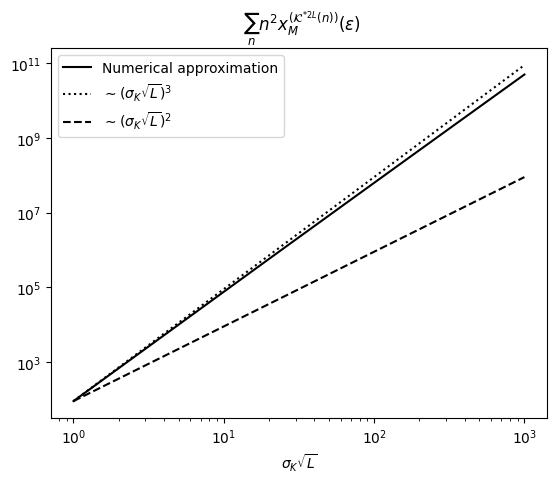

In [6]:
plt.plot(Rs, sums, color='black', label = 'Numerical approximation')
plt.plot(Rs, min(sums) * Rs**3, color = 'black', ls = ':', label=r'$\sim (\sigma_K \sqrt{L})^3$')
plt.plot(Rs, min(sums) * Rs**2, color = 'black', ls = '--', label=r'$\sim (\sigma_K \sqrt{L})^2$')

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r'$\sigma_K \sqrt{L}$')
plt.title(r'$\ \sum_{n} n^2 x_M^{(\mathcal{K}^{* 2 L}(n))}(\epsilon)$')
plt.legend()

plt.savefig('subgaussianity2.pdf')

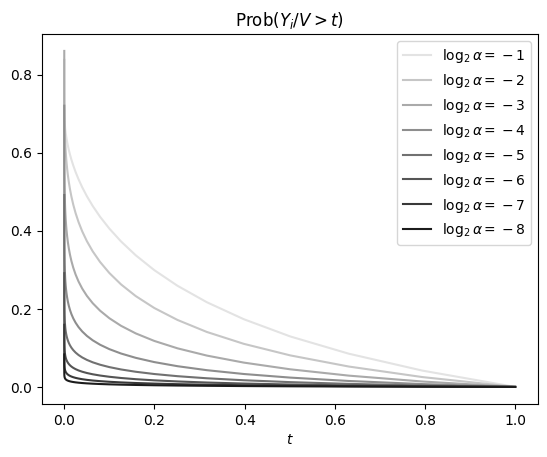

In [97]:
def CDF2(x, g): 
    return 1 / 2**g - 1 / (1 + 1 / x)**g

x = np.logspace(-10, 0, 101)
for n in range(1, 9):

    #plt.plot(x, CDF(x, n, R), )\right)^2
plt.xlabel(r'$t$')
plt.title(r'${\rm Prob}(Y_i / V > t)$')

plt.savefig('subgaussianity1.pdf')
